In [1]:
import pandas as pd
import glob 
import os
import numpy as np

In [2]:
# My library:
import pysom
# https://github.com/takatsuka/DeepSOM 

from pysom.node import Node
from pysom.graph import Graph
from pysom.nodes.bmu import BMU
from pysom.nodes.dist import Dist
from pysom.nodes.scale import Scale
from pysom.nodes.concat import Concat
from pysom.nodes.calibrate import Calibrate
from pysom.nodes.som import SOM, nhood_mexican, nhood_bubble, dist_manhattan, dist_cosine

In [3]:
stocks = pd.read_csv("all_feats.csv")
stocks

,time_id,wap_mean_300,wap_std_300,wap2_mean_300,wap2_std_300,log_returns_realized_volatility_300,log_returns_weighted_volatility_300,log_returns_quarticity_300,log_returns_mean_300,log_returns_std_300,...,bid_ask_spread1_std_150,bid_ask_spread2_mean_150,bid_ask_spread2_std_150,bid_ask_spread3_mean_150,bid_ask_spread3_std_150,ofi_mean_150,ofi_std_150,stock_id,target_mean_enc,beta
0,5,1.003597,0.000851,1.003512,0.001014,0.003394,0.000196,4.521321e-10,7.138250e-06,0.000196,...,0.000178,0.001210,0.000205,0.000287,0.000164,12.646667,79.839784,0,0.002943,1.208072
1,11,0.999987,0.000156,0.999983,0.000182,0.000699,0.000040,2.123766e-12,8.823633e-07,0.000040,...,0.000090,0.000577,0.000130,0.000228,0.000090,0.680000,14.913766,0,0.002974,1.719756
2,16,0.999960,0.000444,1.000110,0.000470,0.001983,0.000115,1.070617e-10,1.729093e-06,0.000115,...,0.000147,0.001063,0.000226,0.000414,0.000187,-3.873333,73.061461,0,0.002985,7.164047
3,31,0.999219,0.000846,0.998835,0.000762,0.001863,0.000108,1.551546e-10,-5.516464e-06,0.000108,...,0.000204,0.001365,0.000316,0.000260,0.000190,-4.780000,47.926520,0,0.002974,6.559597
4,62,0.999769,0.000238,0.999684,0.000335,0.001131,0.000065,3.550845e-11,-2.164288e-06,0.000065,...,0.000115,0.000579,0.000215,0.000253,0.000161,1.920000,54.132019,0,0.002974,0.680616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428927,32751,0.999751,0.000534,0.999942,0.000673,0.002284,0.000132,2.117007e-10,-2.858852e-06,0.000132,...,0.000223,0.001238,0.000213,0.000354,0.000208,3.166667,98.108105,126,0.003887,0.895436
428928,32753,1.001470,0.000507,1.001513,0.000567,0.002217,0.000128,9.484441e-11,3.674218e-06,0.000128,...,0.000189,0.000922,0.000149,0.000187,0.000134,4.560000,39.112723,126,0.003887,-1.346971
428929,32758,1.000656,0.000319,1.000586,0.000396,0.001386,0.000080,3.031629e-11,-2.437732e-06,0.000080,...,0.000193,0.001094,0.000198,0.000250,0.000086,2.626667,51.226900,126,0.003904,0.904714
428930,32763,1.001787,0.000449,1.001794,0.000494,0.002783,0.000161,1.960849e-10,6.737309e-06,0.000161,...,0.000127,0.000847,0.000172,0.000301,0.000132,-14.680000,120.096456,126,0.003904,-0.099107


In [4]:
len(stocks.columns)

88

In [5]:
times = pd.read_csv("all_times.csv")
times

,stock_id,beta,dom,spread,time_id
0,0,1.208072,313.922175,0.000865,5
1,0,0.877839,317.180597,0.000560,18587
2,0,3.588003,347.644247,0.001443,22899
3,0,0.534607,347.246849,0.000654,29616
4,0,0.094537,381.178469,0.001165,697
...,...,...,...,...,...
425819,126,1.263494,371.120683,0.000452,13491
425820,126,2.097909,391.427832,0.000621,10403
425821,126,9.393282,392.956872,0.001065,27939
425822,126,2.466696,397.710374,0.000623,11122


In [6]:
stocks.iloc[:,1:]

,wap_mean_300,wap_std_300,wap2_mean_300,wap2_std_300,log_returns_realized_volatility_300,log_returns_weighted_volatility_300,log_returns_quarticity_300,log_returns_mean_300,log_returns_std_300,log_returns2_realized_volatility_300,...,bid_ask_spread1_std_150,bid_ask_spread2_mean_150,bid_ask_spread2_std_150,bid_ask_spread3_mean_150,bid_ask_spread3_std_150,ofi_mean_150,ofi_std_150,stock_id,target_mean_enc,beta
0,1.003597,0.000851,1.003512,0.001014,0.003394,0.000196,4.521321e-10,7.138250e-06,0.000196,0.005032,...,0.000178,0.001210,0.000205,0.000287,0.000164,12.646667,79.839784,0,0.002943,1.208072
1,0.999987,0.000156,0.999983,0.000182,0.000699,0.000040,2.123766e-12,8.823633e-07,0.000040,0.001448,...,0.000090,0.000577,0.000130,0.000228,0.000090,0.680000,14.913766,0,0.002974,1.719756
2,0.999960,0.000444,1.000110,0.000470,0.001983,0.000115,1.070617e-10,1.729093e-06,0.000115,0.003583,...,0.000147,0.001063,0.000226,0.000414,0.000187,-3.873333,73.061461,0,0.002985,7.164047
3,0.999219,0.000846,0.998835,0.000762,0.001863,0.000108,1.551546e-10,-5.516464e-06,0.000108,0.002422,...,0.000204,0.001365,0.000316,0.000260,0.000190,-4.780000,47.926520,0,0.002974,6.559597
4,0.999769,0.000238,0.999684,0.000335,0.001131,0.000065,3.550845e-11,-2.164288e-06,0.000065,0.002412,...,0.000115,0.000579,0.000215,0.000253,0.000161,1.920000,54.132019,0,0.002974,0.680616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428927,0.999751,0.000534,0.999942,0.000673,0.002284,0.000132,2.117007e-10,-2.858852e-06,0.000132,0.004503,...,0.000223,0.001238,0.000213,0.000354,0.000208,3.166667,98.108105,126,0.003887,0.895436
428928,1.001470,0.000507,1.001513,0.000567,0.002217,0.000128,9.484441e-11,3.674218e-06,0.000128,0.003652,...,0.000189,0.000922,0.000149,0.000187,0.000134,4.560000,39.112723,126,0.003887,-1.346971
428929,1.000656,0.000319,1.000586,0.000396,0.001386,0.000080,3.031629e-11,-2.437732e-06,0.000080,0.002686,...,0.000193,0.001094,0.000198,0.000250,0.000086,2.626667,51.226900,126,0.003904,0.904714
428930,1.001787,0.000449,1.001794,0.000494,0.002783,0.000161,1.960849e-10,6.737309e-06,0.000161,0.004316,...,0.000127,0.000847,0.000172,0.000301,0.000132,-14.680000,120.096456,126,0.003904,-0.099107


In [7]:
s = pd.DataFrame(
    [stocks.iloc[:,1:].groupby(['stock_id'])[x].mean() for i, x in enumerate(stocks.iloc[:,1:].columns)]
)
s

stock_id,0,1,2,3,4,5,6,7,8,9,...,115,116,118,119,120,122,123,124,125,126
wap_mean_300,1.000103,1.000033,1.000018,0.999971,1.000099,1.000023,1.000043,1.000008,1.000022,0.999971,...,1.000061,1.000005,0.999921,0.999978,1.000054,0.999977,0.999962,0.999969,1.000040,1.000019
wap_std_300,0.000749,0.000932,0.000536,0.001296,0.000747,0.000833,0.001505,0.000590,0.001003,0.001126,...,0.000659,0.000848,0.000879,0.000884,0.000762,0.000811,0.000660,0.001054,0.000543,0.000974
wap2_mean_300,1.000071,1.000033,1.000016,0.999963,1.000140,1.000019,1.000048,1.000011,1.000017,0.999927,...,1.000064,1.000003,0.999928,0.999976,1.000054,0.999975,0.999963,0.999967,1.000038,1.000018
wap2_std_300,0.000848,0.000968,0.000550,0.001371,0.000811,0.000922,0.001558,0.000621,0.001021,0.001225,...,0.000700,0.000931,0.000947,0.000900,0.000772,0.000841,0.000671,0.001056,0.000562,0.001054
log_returns_realized_volatility_300,0.003247,0.003467,0.001902,0.004989,0.003380,0.004007,0.005473,0.002542,0.003422,0.004407,...,0.002336,0.003730,0.003720,0.002559,0.002230,0.003005,0.001984,0.002893,0.001585,0.004224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ofi_mean_150,0.876381,0.291765,-0.078550,0.422447,-0.464748,0.135100,2.066303,-0.190752,0.829748,-0.174921,...,0.075255,0.186225,0.157645,-1.127514,1.575916,0.264477,1.564127,6.944548,2.771401,-0.270449
ofi_std_150,68.634047,132.948161,216.979435,118.939158,70.039307,50.370525,163.026519,129.560057,176.597100,94.438649,...,135.742987,77.100020,83.387699,659.379651,293.998136,143.985246,375.016416,989.581984,476.718042,86.366732
stock_id,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,115.000000,116.000000,118.000000,119.000000,120.000000,122.000000,123.000000,124.000000,125.000000,126.000000
target_mean_enc,0.002972,0.003216,0.001744,0.004654,0.003063,0.003757,0.005179,0.002329,0.003213,0.004084,...,0.002129,0.003436,0.003452,0.002391,0.002072,0.002818,0.001851,0.002721,0.001453,0.003896


In [8]:
s = s.transpose()
s

,wap_mean_300,wap_std_300,wap2_mean_300,wap2_std_300,log_returns_realized_volatility_300,log_returns_weighted_volatility_300,log_returns_quarticity_300,log_returns_mean_300,log_returns_std_300,log_returns2_realized_volatility_300,...,bid_ask_spread1_std_150,bid_ask_spread2_mean_150,bid_ask_spread2_std_150,bid_ask_spread3_mean_150,bid_ask_spread3_std_150,ofi_mean_150,ofi_std_150,stock_id,target_mean_enc,beta
stock_id,,,,,,,,,,,,,,,,,,,,,
0,1.000103,0.000749,1.000071,0.000848,0.003247,0.000188,2.582230e-08,-2.417842e-07,0.000188,0.005007,...,0.000266,0.001445,0.000323,0.000395,0.000252,0.876381,68.634047,0.0,0.002972,0.907614
1,1.000033,0.000932,1.000033,0.000968,0.003467,0.000201,1.472412e-08,-5.030437e-09,0.000201,0.004557,...,0.000208,0.001063,0.000237,0.000353,0.000159,0.291765,132.948161,1.0,0.003216,1.491585
2,1.000018,0.000536,1.000016,0.000550,0.001902,0.000110,1.340238e-08,-1.218945e-08,0.000110,0.002469,...,0.000103,0.000497,0.000118,0.000232,0.000071,-0.078550,216.979435,2.0,0.001744,0.390213
3,0.999971,0.001296,0.999963,0.001371,0.004989,0.000289,2.273888e-08,-1.197024e-07,0.000289,0.007046,...,0.000352,0.001595,0.000436,0.000502,0.000324,0.422447,118.939158,3.0,0.004654,1.810942
4,1.000099,0.000747,1.000140,0.000811,0.003380,0.000195,3.952877e-08,1.217825e-07,0.000196,0.004772,...,0.000237,0.001195,0.000280,0.000273,0.000209,-0.464748,70.039307,4.0,0.003063,0.725159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.999977,0.000811,0.999975,0.000841,0.003005,0.000174,5.523956e-09,-1.143740e-07,0.000174,0.003959,...,0.000190,0.000994,0.000224,0.000356,0.000146,0.264477,143.985246,122.0,0.002818,1.318274
123,0.999962,0.000660,0.999963,0.000671,0.001984,0.000115,1.465616e-09,-6.324038e-08,0.000115,0.002505,...,0.000080,0.000491,0.000087,0.000258,0.000033,1.564127,375.016416,123.0,0.001851,0.836428
124,0.999969,0.001054,0.999967,0.001056,0.002893,0.000167,1.059437e-09,-2.427747e-07,0.000167,0.003224,...,0.000060,0.000514,0.000060,0.000308,0.000006,6.944548,989.581984,124.0,0.002721,1.639740


In [9]:
a = pd.DataFrame()
a['stock_id'] = s['stock_id'].apply(int)
a['stock_id']

stock_id
0        0
1        1
2        2
3        3
4        4
      ... 
122    122
123    123
124    124
125    125
126    126
Name: stock_id, Length: 112, dtype: int64

In [10]:
s = s.reset_index(drop=True)
s

,wap_mean_300,wap_std_300,wap2_mean_300,wap2_std_300,log_returns_realized_volatility_300,log_returns_weighted_volatility_300,log_returns_quarticity_300,log_returns_mean_300,log_returns_std_300,log_returns2_realized_volatility_300,...,bid_ask_spread1_std_150,bid_ask_spread2_mean_150,bid_ask_spread2_std_150,bid_ask_spread3_mean_150,bid_ask_spread3_std_150,ofi_mean_150,ofi_std_150,stock_id,target_mean_enc,beta
0,1.000103,0.000749,1.000071,0.000848,0.003247,0.000188,2.582230e-08,-2.417842e-07,0.000188,0.005007,...,0.000266,0.001445,0.000323,0.000395,0.000252,0.876381,68.634047,0.0,0.002972,0.907614
1,1.000033,0.000932,1.000033,0.000968,0.003467,0.000201,1.472412e-08,-5.030437e-09,0.000201,0.004557,...,0.000208,0.001063,0.000237,0.000353,0.000159,0.291765,132.948161,1.0,0.003216,1.491585
2,1.000018,0.000536,1.000016,0.000550,0.001902,0.000110,1.340238e-08,-1.218945e-08,0.000110,0.002469,...,0.000103,0.000497,0.000118,0.000232,0.000071,-0.078550,216.979435,2.0,0.001744,0.390213
3,0.999971,0.001296,0.999963,0.001371,0.004989,0.000289,2.273888e-08,-1.197024e-07,0.000289,0.007046,...,0.000352,0.001595,0.000436,0.000502,0.000324,0.422447,118.939158,3.0,0.004654,1.810942
4,1.000099,0.000747,1.000140,0.000811,0.003380,0.000195,3.952877e-08,1.217825e-07,0.000196,0.004772,...,0.000237,0.001195,0.000280,0.000273,0.000209,-0.464748,70.039307,4.0,0.003063,0.725159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.999977,0.000811,0.999975,0.000841,0.003005,0.000174,5.523956e-09,-1.143740e-07,0.000174,0.003959,...,0.000190,0.000994,0.000224,0.000356,0.000146,0.264477,143.985246,122.0,0.002818,1.318274
108,0.999962,0.000660,0.999963,0.000671,0.001984,0.000115,1.465616e-09,-6.324038e-08,0.000115,0.002505,...,0.000080,0.000491,0.000087,0.000258,0.000033,1.564127,375.016416,123.0,0.001851,0.836428
109,0.999969,0.001054,0.999967,0.001056,0.002893,0.000167,1.059437e-09,-2.427747e-07,0.000167,0.003224,...,0.000060,0.000514,0.000060,0.000308,0.000006,6.944548,989.581984,124.0,0.002721,1.639740
110,1.000040,0.000543,1.000038,0.000562,0.001585,0.000092,1.135814e-09,1.803856e-08,0.000092,0.002067,...,0.000057,0.000611,0.000062,0.000378,0.000019,2.771401,476.718042,125.0,0.001453,0.498564


In [11]:
s = s.reset_index(drop=True)
s= s.drop(['stock_id'],axis=1)

In [12]:
s.isna().any().all()

False

In [14]:
s

,wap_mean_300,wap_std_300,wap2_mean_300,wap2_std_300,log_returns_realized_volatility_300,log_returns_weighted_volatility_300,log_returns_quarticity_300,log_returns_mean_300,log_returns_std_300,log_returns2_realized_volatility_300,...,bid_ask_spread1_mean_150,bid_ask_spread1_std_150,bid_ask_spread2_mean_150,bid_ask_spread2_std_150,bid_ask_spread3_mean_150,bid_ask_spread3_std_150,ofi_mean_150,ofi_std_150,target_mean_enc,beta
0,1.000103,0.000749,1.000071,0.000848,0.003247,0.000188,2.582230e-08,-2.417842e-07,0.000188,0.005007,...,0.001049,0.000266,0.001445,0.000323,0.000395,0.000252,0.876381,68.634047,0.002972,0.907614
1,1.000033,0.000932,1.000033,0.000968,0.003467,0.000201,1.472412e-08,-5.030437e-09,0.000201,0.004557,...,0.000710,0.000208,0.001063,0.000237,0.000353,0.000159,0.291765,132.948161,0.003216,1.491585
2,1.000018,0.000536,1.000016,0.000550,0.001902,0.000110,1.340238e-08,-1.218945e-08,0.000110,0.002469,...,0.000265,0.000103,0.000497,0.000118,0.000232,0.000071,-0.078550,216.979435,0.001744,0.390213
3,0.999971,0.001296,0.999963,0.001371,0.004989,0.000289,2.273888e-08,-1.197024e-07,0.000289,0.007046,...,0.001092,0.000352,0.001595,0.000436,0.000502,0.000324,0.422447,118.939158,0.004654,1.810942
4,1.000099,0.000747,1.000140,0.000811,0.003380,0.000195,3.952877e-08,1.217825e-07,0.000196,0.004772,...,0.000922,0.000237,0.001195,0.000280,0.000273,0.000209,-0.464748,70.039307,0.003063,0.725159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.999977,0.000811,0.999975,0.000841,0.003005,0.000174,5.523956e-09,-1.143740e-07,0.000174,0.003959,...,0.000638,0.000190,0.000994,0.000224,0.000356,0.000146,0.264477,143.985246,0.002818,1.318274
108,0.999962,0.000660,0.999963,0.000671,0.001984,0.000115,1.465616e-09,-6.324038e-08,0.000115,0.002505,...,0.000233,0.000080,0.000491,0.000087,0.000258,0.000033,1.564127,375.016416,0.001851,0.836428
109,0.999969,0.001054,0.999967,0.001056,0.002893,0.000167,1.059437e-09,-2.427747e-07,0.000167,0.003224,...,0.000206,0.000060,0.000514,0.000060,0.000308,0.000006,6.944548,989.581984,0.002721,1.639740
110,1.000040,0.000543,1.000038,0.000562,0.001585,0.000092,1.135814e-09,1.803856e-08,0.000092,0.002067,...,0.000233,0.000057,0.000611,0.000062,0.000378,0.000019,2.771401,476.718042,0.001453,0.498564


## Self-Organizing Map

In [23]:
g = Graph()

som = g.create(SOM, props={"size": 55, "dim": 86, "sigma": 13, "lr": 0.8, "n_iters": 10000})
scale = g.create(Scale)

g.connect(g.start, scale, 1)
g.connect(scale, som, 1)

bmu1 = g.create(BMU, props={"output": "1D"})
bmu2 = g.create(BMU, props={"output": "2D"})
bmu = g.create(BMU, props={"output": "w"})

g.connect(som, bmu1, 0)
g.connect(som, bmu2, 0)
g.connect(som, bmu, 0)

g.connect(bmu2, g.end, 1)

g.set_input(s.values)

bmu1D = g.find_node(bmu1).get_output(1)
bmuW = g.find_node(bmu).get_output(1)

bmu2D = g.get_output()

### Proto-clusters

In [28]:
len(np.unique(bmu1D))

11

In [31]:
set(np.unique(bmu1D))

{14, 39, 54, 545, 2993, 2994, 2995, 3019, 3020, 3022, 3024}

In [32]:
s['som_bmu1D'] = bmu1D
s

,wap_mean_300,wap_std_300,wap2_mean_300,wap2_std_300,log_returns_realized_volatility_300,log_returns_weighted_volatility_300,log_returns_quarticity_300,log_returns_mean_300,log_returns_std_300,log_returns2_realized_volatility_300,...,bid_ask_spread1_std_150,bid_ask_spread2_mean_150,bid_ask_spread2_std_150,bid_ask_spread3_mean_150,bid_ask_spread3_std_150,ofi_mean_150,ofi_std_150,target_mean_enc,beta,som_bmu1D
0,1.000103,0.000749,1.000071,0.000848,0.003247,0.000188,2.582230e-08,-2.417842e-07,0.000188,0.005007,...,0.000266,0.001445,0.000323,0.000395,0.000252,0.876381,68.634047,0.002972,0.907614,54
1,1.000033,0.000932,1.000033,0.000968,0.003467,0.000201,1.472412e-08,-5.030437e-09,0.000201,0.004557,...,0.000208,0.001063,0.000237,0.000353,0.000159,0.291765,132.948161,0.003216,1.491585,54
2,1.000018,0.000536,1.000016,0.000550,0.001902,0.000110,1.340238e-08,-1.218945e-08,0.000110,0.002469,...,0.000103,0.000497,0.000118,0.000232,0.000071,-0.078550,216.979435,0.001744,0.390213,2994
3,0.999971,0.001296,0.999963,0.001371,0.004989,0.000289,2.273888e-08,-1.197024e-07,0.000289,0.007046,...,0.000352,0.001595,0.000436,0.000502,0.000324,0.422447,118.939158,0.004654,1.810942,54
4,1.000099,0.000747,1.000140,0.000811,0.003380,0.000195,3.952877e-08,1.217825e-07,0.000196,0.004772,...,0.000237,0.001195,0.000280,0.000273,0.000209,-0.464748,70.039307,0.003063,0.725159,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.999977,0.000811,0.999975,0.000841,0.003005,0.000174,5.523956e-09,-1.143740e-07,0.000174,0.003959,...,0.000190,0.000994,0.000224,0.000356,0.000146,0.264477,143.985246,0.002818,1.318274,2995
108,0.999962,0.000660,0.999963,0.000671,0.001984,0.000115,1.465616e-09,-6.324038e-08,0.000115,0.002505,...,0.000080,0.000491,0.000087,0.000258,0.000033,1.564127,375.016416,0.001851,0.836428,2994
109,0.999969,0.001054,0.999967,0.001056,0.002893,0.000167,1.059437e-09,-2.427747e-07,0.000167,0.003224,...,0.000060,0.000514,0.000060,0.000308,0.000006,6.944548,989.581984,0.002721,1.639740,3024
110,1.000040,0.000543,1.000038,0.000562,0.001585,0.000092,1.135814e-09,1.803856e-08,0.000092,0.002067,...,0.000057,0.000611,0.000062,0.000378,0.000019,2.771401,476.718042,0.001453,0.498564,3020


In [33]:
bmu1D.flatten()

array([  54,   54, 2994,   54,   54,   54,   54, 2993,  545,   54, 2994,
         54, 3024, 2994, 2994,   54,   54,   54, 2993, 2994, 3024,   54,
         54, 2993,   54, 2994, 2994,   54, 3024, 3024,   54, 2994, 3024,
       2994,   54,   54, 2994,   54, 3024, 2994, 2994, 3024, 3024, 3024,
       2993, 2994, 2994, 2994, 2994,   54, 2995,   54, 2993,   54, 2994,
         54, 3024, 2994,   54, 2994, 2993, 2994, 2993,   14, 2994, 3024,
         54, 2995, 3024,   54,   54,   54,   39,   54, 2994, 3024, 3022,
         54,   54, 3024,   54, 2994,   54, 2994, 2995,   54,   54, 3019,
         54, 2993,   54,   54, 2994, 3020, 2993, 3024,   39,   54, 3024,
         54, 2994,   54, 2993,   54,   54, 3024, 2994, 2995, 2994, 3024,
       3020,   54], dtype=int64)

In [56]:
df = pd.DataFrame({'som_bmu1D': bmu1D.flatten(), 'stock_id': a['stock_id']})
df.to_csv("som_bmu1D.csv")

In [57]:
df

,som_bmu1D,stock_id
stock_id,,
0,54,0
1,54,1
2,2994,2
3,54,3
4,54,4
...,...,...
122,2995,122
123,2994,123
124,3024,124


In [35]:
len(bmu1D)

112

In [36]:
len(a['stock_id'])

112

In [37]:
s['stock_id'] = (a['stock_id'])
s['stock_id'].isna().any()

True

## Cluster SOM labels

In [38]:
bmu2D

array([[ 5, 21],
       [28, 36],
       [39,  3],
       [15, 51],
       [ 0,  7],
       [ 9, 31],
       [12, 49],
       [18,  0],
       [28, 30],
       [ 9, 42],
       [38, 19],
       [24, 41],
       [47,  5],
       [43, 30],
       [25, 15],
       [ 2, 20],
       [32, 47],
       [ 0, 54],
       [ 4,  0],
       [29,  4],
       [54,  9],
       [14, 29],
       [23, 26],
       [32, 14],
       [ 0, 48],
       [31,  8],
       [54, 24],
       [ 0, 13],
       [54, 54],
       [54, 46],
       [ 0, 39],
       [26,  0],
       [46, 39],
       [39, 34],
       [ 4, 43],
       [25, 44],
       [30,  0],
       [20, 54],
       [54,  0],
       [24, 11],
       [54, 23],
       [45, 16],
       [47,  0],
       [54,  3],
       [10,  0],
       [45, 25],
       [33,  5],
       [25,  5],
       [35,  0],
       [20, 46],
       [34, 33],
       [31, 54],
       [16,  9],
       [33, 54],
       [37, 29],
       [15, 36],
       [40, 21],
       [39,  0],
       [10, 14

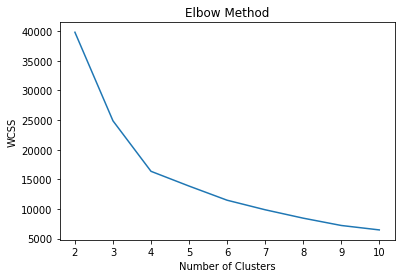

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means clustering with unknown number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(bmu2D)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(bmu2D)
kmeans.labels_

num_clusters = len(set(kmeans.labels_))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

Estimated number of clusters: 4


In [58]:
df['bmu2D_km4'] = kmeans.labels_

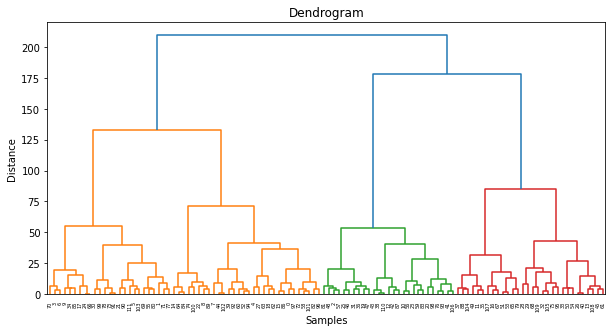

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical clustering
Z = linkage(bmu2D, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [43]:
# Estimate number of clusters
max_d = 100 # Maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")


Estimated number of clusters: 4


In [59]:
df['bmu2D_agg4']=clusters

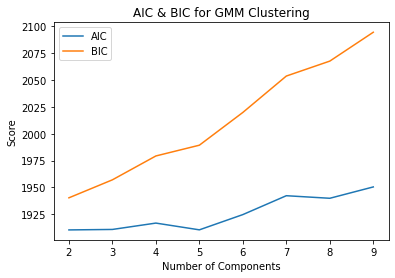

In [45]:
from sklearn.mixture import GaussianMixture

# GMM clustering with AIC and BIC
n_components = np.arange(2, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=1).fit(bmu2D) for n in n_components]
plt.plot(n_components, [m.aic(bmu2D) for m in models], label='AIC')
plt.plot(n_components, [m.bic(bmu2D) for m in models], label='BIC')

plt.title('AIC & BIC for GMM Clustering')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc = 'best')

plt.show()

In [60]:
# GMM clustering with optimal number of clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=1)
labels = gmm.fit_predict(bmu2D)
df['bmu2D_gmm5']=labels
df

,som_bmu1D,stock_id,bmu2D_km4,bmu2D_agg4,bmu2D_gmm5
stock_id,,,,,
0,54,0,3,2,1
1,54,1,2,1,3
2,2994,2,0,3,4
3,54,3,1,1,0
4,54,4,3,2,1
...,...,...,...,...,...
122,2995,122,2,4,3
123,2994,123,2,4,3
124,3024,124,2,4,3


In [50]:
df.reset_index(drop=True)

df['stock_id'] = a['stock_id']
df

,som_bmu1D,stock_id,bmu2D_km4,bmu2D_agg4,bmu2D_gmm7
stock_id,,,,,
0,54,0,3,2,1
1,54,1,2,1,3
2,2994,2,0,3,4
3,54,3,1,1,0
4,54,4,3,2,1
...,...,...,...,...,...
122,2995,122,2,4,3
123,2994,123,2,4,3
124,3024,124,2,4,3


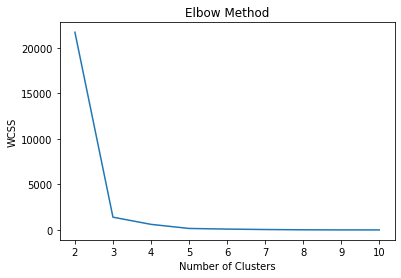

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means clustering with unknown number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(bmuW)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(bmuW)

num_clusters = len(set(kmeans.labels_))

# Print number of clusters
df['bmuW_km3']=kmeans.labels_
df

,som_bmu1D,stock_id,bmu2D_km4,bmu2D_agg4,bmu2D_gmm5,bmuW_km3
stock_id,,,,,,
0,54,0,3,2,1,1
1,54,1,2,1,3,1
2,2994,2,0,3,4,0
3,54,3,1,1,0,1
4,54,4,3,2,1,1
...,...,...,...,...,...,...
122,2995,122,2,4,3,0
123,2994,123,2,4,3,0
124,3024,124,2,4,3,2


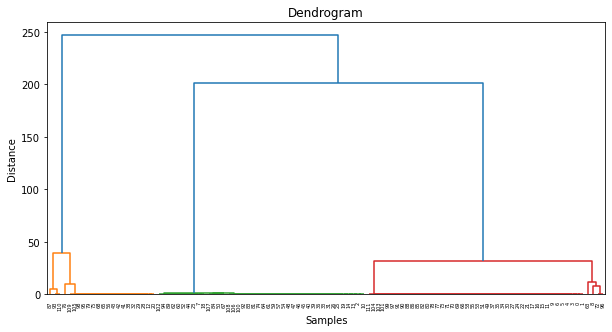

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical clustering
Z = linkage(bmuW, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [64]:
# Estimate number of clusters
max_d = 50 # Maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

Estimated number of clusters: 3


In [65]:
df['bmuW_agg3']=clusters
df

,som_bmu1D,stock_id,bmu2D_km4,bmu2D_agg4,bmu2D_gmm5,bmuW_km3,bmuW_agg3
stock_id,,,,,,,
0,54,0,3,2,1,1,3
1,54,1,2,1,3,1,3
2,2994,2,0,3,4,0,2
3,54,3,1,1,0,1,3
4,54,4,3,2,1,1,3
...,...,...,...,...,...,...,...
122,2995,122,2,4,3,0,2
123,2994,123,2,4,3,0,2
124,3024,124,2,4,3,2,1


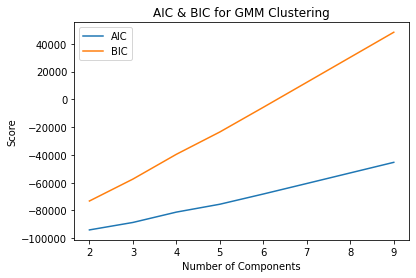

In [66]:
from sklearn.mixture import GaussianMixture

# GMM clustering with AIC and BIC
n_components = np.arange(2, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(bmuW) for n in n_components]
plt.plot(n_components, [m.aic(bmuW) for m in models], label='AIC')
plt.plot(n_components, [m.bic(bmuW) for m in models], label='BIC')

plt.title('AIC & BIC for GMM Clustering')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc = 'best')

plt.show()

In [68]:
a = df['som_bmu1D'].values

array([  54,   54, 2994,   54,   54,   54,   54, 2993,  545,   54, 2994,
         54, 3024, 2994, 2994,   54,   54,   54, 2993, 2994, 3024,   54,
         54, 2993,   54, 2994, 2994,   54, 3024, 3024,   54, 2994, 3024,
       2994,   54,   54, 2994,   54, 3024, 2994, 2994, 3024, 3024, 3024,
       2993, 2994, 2994, 2994, 2994,   54, 2995,   54, 2993,   54, 2994,
         54, 3024, 2994,   54, 2994, 2993, 2994, 2993,   14, 2994, 3024,
         54, 2995, 3024,   54,   54,   54,   39,   54, 2994, 3024, 3022,
         54,   54, 3024,   54, 2994,   54, 2994, 2995,   54,   54, 3019,
         54, 2993,   54,   54, 2994, 3020, 2993, 3024,   39,   54, 3024,
         54, 2994,   54, 2993,   54,   54, 3024, 2994, 2995, 2994, 3024,
       3020,   54], dtype=int64)

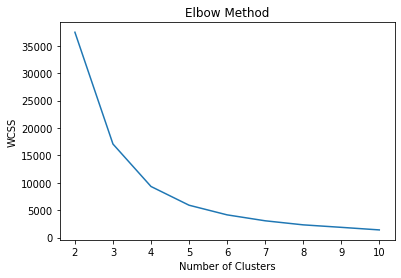

In [69]:
# K-means clustering with unknown number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(a)

num_clusters = len(set(kmeans.labels_))

In [79]:
df

,som_bmu1D,stock_id,bmu2D_km4,bmu2D_agg4,bmu2D_gmm5,bmuW_km3,bmuW_agg3
stock_id,,,,,,,
0,2,0,3,2,1,1,3
1,2,1,2,1,3,1,3
2,2,2,0,3,4,0,2
3,2,3,1,1,0,1,3
4,2,4,3,2,1,1,3
...,...,...,...,...,...,...,...
122,1,122,2,4,3,0,2
123,1,123,2,4,3,0,2
124,1,124,2,4,3,2,1


In [77]:
df['som_bmu1D'] = kmeans.labels_

df.to_csv("SOM_clusters.csv")

In [85]:
df['stock_ids'] = a['stock_id']

In [90]:
df = df.reset_index(drop=True)

df = df.drop(['stock_ids'], axis=1)
df.to_csv("SOM_clusters.csv", index=False)